In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # To ignore SettingWithCopyWarning warning

# Import data

In [2]:
path = 'C:/Users/Akis/OneDrive/Masters/Web Economics/Data/WebEcon Team Drive/Datasets Original/'
train = pd.read_csv(path+"train.csv")
validation = pd.read_csv(path+"validation.csv")

In [3]:
print(train.shape, validation.shape)

(2430981, 25) (303925, 25)


# Import Predictions

In [4]:
path='C:/Users/Akis/OneDrive/Masters/Web Economics/Data/WebEcon Team Drive/predictions/'
# lr_preds = pd.read_csv("Prediction_csv/lr_pCTR.csv", index_col  = "Unnamed: 0")
# rf_preds = pd.read_csv("Prediction_csv/rf_pCTR.csv", index_col  = "Unnamed: 0")
####xgb_preds = pd.read_csv("Prediction_csv/xgb_pCTR.csv", index_col  = "Unnamed: 0")
# dwane_preds = pd.read_csv("Prediction_csv/click_predictions_narrow.csv")
# lasso_preds = pd.read_csv("Prediction_csv/lasso_basebid.csv", index_col  = "Unnamed: 0")
# ridge_preds = pd.read_csv("Prediction_csv/ridge_basebid.csv", index_col  = "Unnamed: 0")
# elasticnet_preds = pd.read_csv("Prediction_csv/elasticnet_basebid.csv", index_col  = "Unnamed: 0")
# rfg_preds = pd.read_csv("Prediction_csv/rfg_basebid.csv", index_col  = "Unnamed: 0")
####xgbr_preds = pd.read_csv("Prediction_csv/xgb_basebid.csv", index_col  = "Unnamed: 0")

#xgb_preds = pd.read_csv(path+"xgb_pCTR.csv", index_col  = "Unnamed: 0")
xgb_preds = pd.read_csv(path+"test_click_predictions_narrow_2018-03-12.csv", index_col  = "Unnamed: 0")
xgbr_preds = pd.read_csv(path+"xgb_basebid.csv", index_col  = "Unnamed: 0")

In [5]:
xgbr_preds.head()

,bidid,predicted_payprice
0,bbcb813b6166538503d8b33a5602d7d72f6019dc,50.281219
1,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,78.790169
2,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,92.860153
3,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,45.761795
4,0899bf144249458ea9c89188473694bf44c7ca15,64.029907


In [6]:
print("Predicted Bid Price Min:",xgbr_preds['predicted_payprice'].min())
print("Predicted Bid Price Max:",xgbr_preds['predicted_payprice'].max())
print("Predicted Bid Price Mean:",xgbr_preds['predicted_payprice'].mean())
print("Predicted Bid Price Std:",xgbr_preds['predicted_payprice'].std())

Predicted Bid Price Min: -56.3769416809082
Predicted Bid Price Max: 346.9530944824219
Predicted Bid Price Mean: 78.97979187519267
Predicted Bid Price Std: 36.59964614741393


# Linear Strategy

In [7]:
def Strategy1(sub_pCTR, sub_basebid, C ,BBimportance):
    
    #print(sub_basebid.head(100))
    importance = BBimportance * 10 
    avgCTR = sub_pCTR["click_proba"].mean()
    
    mean = sub_basebid["predicted_payprice"].mean()
    sub_basebid["predicted_payprice"] = sub_basebid["predicted_payprice"]-mean
    sub_basebid["predicted_payprice"] = (importance * sub_basebid["predicted_payprice"]/sub_basebid["predicted_payprice"].max())
    sub_basebid["predicted_payprice"] = sub_basebid["predicted_payprice"] + mean
    #importance is a constant to be played around with
    
    avgBB = sub_basebid["predicted_payprice"].mean()
    
    print("avBB/pBB Min:",(avgBB/sub_basebid["predicted_payprice"]).min())
    print("avBB/pBB Max:",(avgBB/sub_basebid["predicted_payprice"]).max())
#     print("avBB/pBB Mean:",(avgBB/sub_basebid["predicted_payprice"]).mean())
#     print("avBB/pBB Std:",(avgBB/sub_basebid["predicted_payprice"]).std())
#     print()
    
#     print("pCTR/avCTR Min:",(sub_pCTR["click_proba"]/ avgCTR).min())
#     print("pCTR/avCTR Max:",(sub_pCTR["click_proba"]/ avgCTR).max())
#     print("pCTR/avCTR Mean:",(sub_pCTR["click_proba"]/ avgCTR).mean())
#     print("pCTR/avCTR Std:",(sub_pCTR["click_proba"]/ avgCTR).std())
    
    bidprice1 = (avgBB/sub_basebid["predicted_payprice"]) * (sub_pCTR["click_proba"]/ avgCTR) * C
    #print(bidprice1.head(5))
    #sub_pCTR_["click_proba"] = (sub_pCTR_["click_proba"] + (1-avgCTR))**2 - (1-avgCTR)
    #bidprice2 = (avgBB/sub_basebid["predicted_payprice"]) * (sub_pCTR["click_proba"]/ avgCTR) * C
    return bidprice1

In [8]:
def Strategy2(sub_pCTR, sub_basebid, C ,BBimportance):
    
    #print(sub_basebid.head(2))
    importance = BBimportance * 10 
    avgCTR = sub_pCTR["click_proba"].mean()
    
    mean = sub_basebid["predicted_payprice"].mean()
    sub_basebid["predicted_payprice"] = sub_basebid["predicted_payprice"]-mean
    sub_basebid["predicted_payprice"] = (importance * sub_basebid["predicted_payprice"]/sub_basebid["predicted_payprice"].max())
    sub_basebid["predicted_payprice"] = sub_basebid["predicted_payprice"] + mean
    #importance is a constant to be played around with
    
    avgBB = sub_basebid["predicted_payprice"].mean()
    
    print("avBB/pBB Min:",(avgBB/sub_basebid["predicted_payprice"]).min())
    print("avBB/pBB Max:",(avgBB/sub_basebid["predicted_payprice"]).max())
#     print("avBB/pBB Mean:",(avgBB/sub_basebid["predicted_payprice"]).mean())
#     print("avBB/pBB Std:",(avgBB/sub_basebid["predicted_payprice"]).std())
#     print()
    
#     print("pCTR/avCTR Min:",(sub_pCTR["click_proba"]/ avgCTR).min())
#     print("pCTR/avCTR Max:",(sub_pCTR["click_proba"]/ avgCTR).max())
#     print("pCTR/avCTR Mean:",(sub_pCTR["click_proba"]/ avgCTR).mean())
#     print("pCTR/avCTR Std:",(sub_pCTR["click_proba"]/ avgCTR).std())
    
    #bidprice1 = (avgBB/sub_basebid["predicted_payprice"]) * (sub_pCTR["click_proba"]/ avgCTR) * C
    sub_pCTR["click_proba"] = (sub_pCTR["click_proba"] + (1-avgCTR))**2 - (1-avgCTR)
    bidprice2 = (avgBB/sub_basebid["predicted_payprice"]) * (sub_pCTR["click_proba"]/ avgCTR) * C
    return bidprice2

In [9]:
#temp1 = Strategy1(xgb_preds, xgbr_preds, 93, 0) # 1 to 15 is a good range

In [10]:
base_bid = train.loc[ train["click"] == 1, "payprice"].mean()
base_bid

105.46402677077523

In [11]:
base_bid = 89
basebids = np.linspace(0.90*base_bid, 1.06*base_bid, 8)
basebids = np.linspace(base_bid+11, base_bid+43, 33)
basebids

array([100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.])

# Evaluate Results

In [12]:
budget = 6250*1000

def ValidationDataFrame(submission_pCTR, submission_basebid, C, BBimportance,strategy):
    
    validation_check = validation[["bidid", "click", "bidprice", "payprice"]]
    validation_check["click_proba"] = submission_pCTR["click_proba"]
    validation_check["bidprice_predicted"] = strategy(submission_pCTR, submission_basebid, C , BBimportance)
    #print(validation_check.head(5))
    #print()
    
    return validation_check


def ValidateStrategy(df):
    
    impressions = 0
    clicks = 0
    cost = 0
    auctions_participated = 0
    balance = budget
    
    for row in df.iterrows():
        
        if cost < budget:
            
            auctions_participated+=1
            
            if (row[1]["bidprice_predicted"] >= row[1]["payprice"]):
                
                if (balance > row[1]["bidprice_predicted"]):
                    
                    impressions+=1
                    clicks+=row[1]["click"]
                    cost+=row[1]["payprice"]
                    balance-=row[1]["payprice"]
                else:
                    pass
    
        else:
            break
    
    # Metrics
    ctr = clicks*100/impressions
    cpm = cost/impressions
    cpc = cost/clicks/1000
    
    print("Strategy statistics:")
    print("Auctions participated: {} | Impressions: {} | Clicks: {} | Cost: {} | CTR: {} | CPM: {} | CPC: {}".format(auctions_participated, \
                                                                                                                     impressions, clicks, \
                                                                                                                     cost,\
                                                                                                                     np.round(ctr,5), \
                                                                                                                     np.round(cpm,5), \
                                                                                                                     np.round(cpc,2)))
    print("\n")
            
    return impressions, clicks, cost, auctions_participated, ctr, cpm, cpc

In [13]:
pCTR_model_name = "XGBoost"
results = pd.DataFrame(columns = ["pCTR_model", "Coefficient", "Impressions", "Clicks", "Cost", "CTR", "CPM", "CPC"])
i=0
Strategies=[Strategy2]

start = time.time()

for C in basebids:
    for BBIMPORTANCE in range(1,11,1): #10
        for strat in Strategies:
            print("pCTR model:",pCTR_model_name,"  Constant:",C,"  Strategy:",strat.__name__,"  pBB Importance:",BBIMPORTANCE)
            xgbr_preds_temp = xgbr_preds.copy(True)
            xgb_preds_temp = xgb_preds.copy(True)
            validation_check = ValidationDataFrame(xgb_preds_temp, xgbr_preds_temp, C, BBIMPORTANCE,strat)
            #print(validation_check.head(10))
            impressions, clicks, cost, auctions_participated, ctr, cpm, cpc = ValidateStrategy(validation_check)
            results.loc[i] = [pCTR_model_name, C, impressions, clicks, cost, ctr, cpm, cpc]
            i+=1
    
end = time.time()
print("Total time: {} mins".format((end-start)/60))

pCTR model: XGBoost   Constant: 100.0   Strategy: Strategy2   pBB Importance: 1
avBB/pBB Min: 0.8876149315563202
avBB/pBB Max: 1.0683243449944873
Strategy statistics:
Auctions participated: 303925 | Impressions: 88244 | Clicks: 160 | Cost: 6138740 | CTR: 0.18132 | CPM: 69.56552 | CPC: 38.37


pCTR model: XGBoost   Constant: 100.0   Strategy: Strategy2   pBB Importance: 2
avBB/pBB Min: 0.7979385526974939
avBB/pBB Max: 1.1466698085913545
Strategy statistics:
Auctions participated: 303925 | Impressions: 88110 | Clicks: 160 | Cost: 6108272 | CTR: 0.18159 | CPM: 69.32552 | CPC: 38.18


pCTR model: XGBoost   Constant: 100.0   Strategy: Strategy2   pBB Importance: 3
avBB/pBB Min: 0.7247196064169835
avBB/pBB Max: 1.2374155602784336
Strategy statistics:
Auctions participated: 303925 | Impressions: 87958 | Clicks: 160 | Cost: 6076813 | CTR: 0.18191 | CPM: 69.08767 | CPC: 37.98


pCTR model: XGBoost   Constant: 100.0   Strategy: Strategy2   pBB Importance: 4
avBB/pBB Min: 0.6638084554563409
avBB/

In [14]:
xgbr_preds.head(10)

,bidid,predicted_payprice
0,bbcb813b6166538503d8b33a5602d7d72f6019dc,50.281219
1,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,78.790169
2,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,92.860153
3,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,45.761795
4,0899bf144249458ea9c89188473694bf44c7ca15,64.029907
5,f4c6a9a3b1db6da035c7e2a36d4f5e389095beca,28.720341
6,786a2940f225482dc04d455dc7a7fea436b02e03,100.595055
7,17ada861c6ed0616f88312ba0d3d76c0f95b4940,87.275414
8,6abd8ef3eb678b1afe67dc0cff0aa58413fbf29a,46.565254
9,442ffca310e325abc255e8ff97d9812051336acd,37.040314


In [15]:
xgb_preds.head(10)

,bidid,click_proba
0,bbcb813b6166538503d8b33a5602d7d72f6019dc,0.007022
1,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,0.009050
2,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,0.000875
3,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,0.004929
4,0899bf144249458ea9c89188473694bf44c7ca15,0.005435
5,f4c6a9a3b1db6da035c7e2a36d4f5e389095beca,0.101252
6,786a2940f225482dc04d455dc7a7fea436b02e03,0.024425
7,17ada861c6ed0616f88312ba0d3d76c0f95b4940,0.046974
8,6abd8ef3eb678b1afe67dc0cff0aa58413fbf29a,0.006084
9,442ffca310e325abc255e8ff97d9812051336acd,0.002432


In [16]:
results.to_csv("ValidationSet_Evaluation_Results_Individual_xgb_xcgr.csv")

In [17]:
results.head()

,pCTR_model,Coefficient,Impressions,Clicks,Cost,CTR,CPM,CPC
0,XGBoost,100.0,88244.0,160.0,6138740.0,0.181315,69.565523,38.367125
1,XGBoost,100.0,88110.0,160.0,6108272.0,0.181591,69.325525,38.176700
2,XGBoost,100.0,87958.0,160.0,6076813.0,0.181905,69.087667,37.980081
3,XGBoost,100.0,87825.0,160.0,6044553.0,0.182180,68.824970,37.778456
4,XGBoost,100.0,87727.0,159.0,6019183.0,0.181244,68.612662,37.856497


In [18]:
results.sort_values(by = ["Clicks",'CTR'], ascending = False)

,pCTR_model,Coefficient,Impressions,Clicks,Cost,CTR,CPM,CPC
51,XGBoost,105.0,89391.0,162.0,6237957.0,0.181226,69.782830,38.505907
62,XGBoost,106.0,89570.0,162.0,6238999.0,0.180864,69.655007,38.512340
117,XGBoost,111.0,90362.0,162.0,6240467.0,0.179279,69.060745,38.521401
14,XGBoost,101.0,88025.0,161.0,6049937.0,0.182903,68.729759,37.577248
24,XGBoost,102.0,88288.0,161.0,6076070.0,0.182358,68.821018,37.739565
23,XGBoost,102.0,88379.0,161.0,6098808.0,0.182170,69.007434,37.880795
34,XGBoost,103.0,88548.0,161.0,6101689.0,0.181822,68.908264,37.898689
33,XGBoost,103.0,88646.0,161.0,6127879.0,0.181621,69.127530,38.061360
20,XGBoost,102.0,88744.0,161.0,6188617.0,0.181421,69.735610,38.438615
45,XGBoost,104.0,88745.0,161.0,6106160.0,0.181419,68.805679,37.926460


ValueError: x and y must have same first dimension, but have shapes (33,) and (330,)

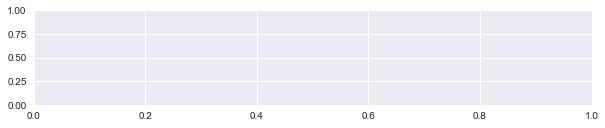

In [19]:
plt.figure(figsize = (10,8))

plt.subplot(4,1,1)
plt.plot(basebids, results["Clicks"])
plt.ylabel("Clicks")

plt.subplot(4,1,2)
plt.plot(basebids, results["Impressions"])
plt.ylabel("Impressions")

plt.subplot(4,1,3)
plt.plot(basebids, results["CTR"])
plt.ylabel("CTR")

plt.subplot(4,1,4)
plt.plot(basebids, results["Cost"])
plt.ylabel("Cost")
plt.xlabel("Constant")

plt.tight_layout()